In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
dir_my   = '/home/debian/software/CHIMERA/CHIMERA/astropopulations/mass_funct/test_mass/'
dir_MGCP = '/home/debian/software/MGCosmoPop'
dir_CHIMERA = '/home/debian/software/CHIMERA/'

sys.path.append(dir_my)
sys.path.append(dir_MGCP)
sys.path.append(dir_CHIMERA)

from CHIMERA.astro.mass import (_logpdfm2_PL, _logC_PL, logpdf_PL, _logpdfm1_PLP, _logpdfm2_SPL, _logC_SPL,
                         _logSmoothing, _logC_SPL, _logN_PLP, logpdf_PLP)

# lambda_mass  = {"lambdaPeak" :      0.039, 
#                 "alpha" :           3.4,
#                 "beta" :            1.1, 
#                 "deltam" :          4.8, 
#                 "ml" :              5.1, 
#                 "mh" :              87., 
#                 "muMass" :          34., 
#                 "sigmaMass" :       3.6,}
lambda_mass  = {"lambdaPeak" :      0.039, 
                "alpha" :           3.4,
                "beta" :            1.1, 
                "deltam" :          4.8, 
                "ml" :              5.1, 
                "mh" :              87., 
                "muMass" :          60., 
                "sigmaMass" :       9,}

lm_m1  = [lambda_mass[k] for k in ["lambdaPeak", "alpha",  "deltam","ml",  "mh", "muMass", "sigmaMass"]]
lm_m1_MG  = [lambda_mass[k] for k in ["lambdaPeak", "alpha", "deltam", "ml",  "mh", "muMass", "sigmaMass"]]

 


lambdaPeak,alpha,beta,deltam,ml,  mh, muMass, sigmaMass = [lambda_mass[k] for k in ["lambdaPeak", "alpha", "beta", "deltam", "ml", "mh", "muMass", "sigmaMass"]]

from MGCosmoPop.population.astro.astroMassDistribution import PowerLawPlusPeakMass, truncated_power_law, norm_truncated_pl, MultiPeakMass, TruncPowerLawMass


m1 = np.linspace(1,20,5000)
m2 = 0.5*m1


# import astro_smooth

In [2]:

# def _logpdf_TPL(x, alpha, mmin, mmax):
#     norm_const = (1 - alpha) / (mmax**(1 - alpha) - mmin**(1 - alpha))
#     return -alpha*np.log(x) + np.log(norm_const)

# def _logpdf_G(x, mu, sigma):
#     return -0.5*np.log(2 * np.pi) -np.log(sigma) - (x-mu)**2/(2. *sigma**2)

# def _logSmoothing(m, delta_m, ml):
#     # Smoothing function
#     maskL      = m <= ml
#     maskU      = m >= (ml + delta_m)
#     conditions = [maskL, maskU, ~(maskL | maskU)]
#     functions  = [-np.inf, 0., lambda x: -np.logaddexp(0., (delta_m/(x-ml) + delta_m/(x-ml-delta_m)))]
#     return np.piecewise(m, conditions, functions)

# ######################################################
# ###################################################### PL
# ######################################################

# def _logpdfm2_PL(m2, beta, ml):
#     # Conditional distribution p(m2 | m1)
#     return np.where(m2 >= ml, beta*np.log(m2), -np.inf)

# def _logC_PL(m1, beta, ml):
#     return np.log((1+beta) / (m1**(1+beta) - ml**(1+beta)))

# def logpdf_PL(m1, m2, lambda_m):
#     """Power-law mass distribution, p(m1,m2|lambda_m) normalized

#     Args:
#         m1 (np.ndarray): primary mass
#         m2 (np.ndarray): secondary mass
#         lambda_m (dict): parameters of the mass function with keys: 
#                          ["alpha", "beta", "ml", "mh"]
#     """
#     # Unpack parameters
#     lpar = ["alpha", "beta", "ml", "mh"]
#     alpha, beta, ml, mh = [lambda_m[p] for p in lpar]

#     return np.where((ml < m2) & (m2 < m1) & (m1 < mh),
                    
#                     # compute logprob
#                     _logpdf_TPL(m1, alpha, ml, mh) + _logpdfm2_PL(m2, beta, ml) + _logC_PL(m1, beta, ml),

#                     # return zero probability
#                     -np.inf)


# ######################################################
# ###################################################### Broken PL
# ######################################################

# # TBD



# ######################################################
# ###################################################### Smooth PL
# ######################################################


# def _logpdfm2_SPL(m2, beta, delta_m, ml):
#     # Conditional distribution p(m2 | m1)

#     return np.where(m2 >= ml, 
#                     beta*np.log(m2) + _logSmoothing(m2, delta_m, ml), 
#                     -np.inf)

# def _logC_SPL(m1, beta, delta_m, ml, res=200):
#     # Inverse log integral of PL p(m1, m2) dm2 (i.e. log C(m1) in the LVC notation)

#     mmid = ml + delta_m + delta_m/10.
#     mm   = np.concatenate([np.linspace(ml, mmid, 200),
#                            np.linspace(mmid + 1e-1, np.max(m1), res)])
#     mm   = np.sort(mm)
#     p2   = np.exp(_logpdfm2_SPL(mm, beta, delta_m, ml))
#     cdf  = np.cumsum(0.5*(p2[:-1] + p2[1:]) * np.diff(mm))

#     return -np.log(np.interp(m1, mm[1:], cdf))


# # TBD


# ######################################################
# ###################################################### PL + Peak
# ######################################################

# def _logpdfm1_PLP(m1, lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g):
#     # Marginal distribution p(m1), not normalised
#     P = np.exp(_logpdf_TPL(m1, alpha, ml, mh))
#     G = np.exp(_logpdf_G(m1, mu_g, sigma_g))

#     return np.where((m1 >= ml) & (m1 <= max(mh, mu_g+10*sigma_g)), 
#                     np.log((1-lambda_peak)*P + lambda_peak*G) + _logSmoothing(m1, delta_m, ml), 
#                     -np.inf)

# def _logN_PLP(lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g, res=200):
#     # log integral of PLP p(m1, m2) dm1 dm2 (i.e. total normalization of mass function )

#     if lambda_peak==0:
#         mm = np.linspace(ml, mh, res) 
#     else:
#         mmax = max(mh, mu_g+10*sigma_g)
#         mmid = ml + delta_m + delta_m/10.

#         mm   = np.concatenate([np.linspace(1., mmid, 200),                                    # lower edge                                                    
#                                np.linspace(mmid+1e-1, mu_g-5*sigma_g, int(res/2)),            # before gaussian peak
#                                np.linspace(mu_g-5*sigma_g+1e-1, mu_g+5*sigma_g, int(res/2)),  # gaussian peak
#                                np.linspace(mu_g+5*sigma_g+1e-1, mmax+mmax/2, int(res/2)) ])   # after gaussian peak
#         mm   = np.sort(mm)
#         p1   = np.exp(_logpdfm1_PLP(mm, lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g))
        
#     return np.log(np.trapz(p1,mm))

# def logpdf_PLP(m1, m2, lambda_m):
#     """Power-law+Peak mass distribution, p(m1,m2|lambda_m) normalized

#     Args:
#         m1 (np.ndarray): primary mass
#         m2 (np.ndarray): secondary mass
#         lambda_m (dict): parameters of the mass function with keys: 
#                          ["lambda_peak", "alpha", "beta", "delta_m", "ml", "mh", "mu_g", "sigma_g"]
#     """

#     # Unpack parameters
#     lpar = ["lambda_peak", "alpha", "beta", "delta_m", "ml", "mh", "mu_g", "sigma_g"]
#     lambda_peak, alpha, beta, delta_m, ml, mh, mu_g, sigma_g = [lambda_m[p] for p in lpar]

#     return np.where((ml < m2) & (m2 < m1) & (m1 < max(mh, mu_g+10*sigma_g)),
                    
#                     # compute logprob
#                     _logpdfm1_PLP(m1, lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g) + \
#                     _logpdfm2_SPL(m2, beta, delta_m, ml) + _logC_SPL(m1, beta, delta_m, ml) - \
#                     _logN_PLP(lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g) , 

#                     # return zero probability
#                     -np.inf)


# ######################################################
# ###################################################### PL + 2 Peaks
# ######################################################

# def _logpdfm1_PL2P(m1, lp, l1, alpha, dm, ml, mh, mu1, s1, mu2, s2):
#     # Marginal distribution p(m1), not normalised
#     P  = np.exp(_logpdf_TPL(m1, alpha, ml, mh))
#     G1 = np.exp(_logpdf_G(m1, mu1, s1))
#     G2 = np.exp(_logpdf_G(m1, mu2, s2))

#     return np.where((m1 >= ml) & (m1 <= max(mh, mu2+10*s2)), 
#                     np.log((1.-lp)*P + lp*l1*G1 + lp*(1.-l1)*G2) + _logSmoothing(m1, dm, ml), 
#                     -np.inf)

# def _logN_PL2P(lp, l1, alpha, dm, ml, mh, mu1, s1, mu2, s2, res=200):
#     # log integral of PL2P p(m1, m2) dm1 dm2 (i.e. total normalization of mass function )

#     if lp==0 and l1==0:
#         mm = np.linspace(ml, mh, res) 
#     else:
#         mmax = max(mh, mu2+10*s2)
#         mmid = ml + dm + dm/10.

#         mm   = np.concatenate([np.linspace(1., mmid, 200),                              # lower edge                                                    
#                                np.linspace(mmid+1e-1, mu1-5*s1, int(res/2)),            # before 1st gaussian peak
#                                np.linspace(mu1-5*s1+1e-1, mu1+5*s1, int(res/2)),        # 1st gaussian peak
#                                np.linspace(mu1+5*s1+1e-1, mu2-5*s2, int(res/2)),        # after 1st gaussian peak
#                                np.linspace(mu2-5*s2+1e-1, mu2+5*s2, int(res/2)),        # 2nd gaussian peak
#                                np.linspace(mu2+5*s2+1e-1, mmax+mmax/2, int(res/2)) ])   # after 1st gaussian peak
#         mm   = np.sort(mm)
    
#         p1   = np.exp(_logpdfm1_PL2P(mm, lp, l1, alpha, dm, ml, mh, mu1, s1, mu2, s2))
        
#     return np.log(np.trapz(p1,mm))


# def logpdf_PL2P(m1, m2, lambda_m):
#     """Power-law+Peak mass distribution, p(m1,m2|lambda_m) normalized

#     Args:
#         m1 (np.ndarray): primary mass
#         m2 (np.ndarray): secondary mass
#         lambda_m (dict): parameters of the mass function with keys: 
#                          ["lambda_peak", "lambda1", "alpha", "beta", "delta_m", "ml", "mh", "mu1", "s1", "mu2", "s2"]
#     """

#     # Unpack parameters
#     lpar = ["lambda_peak", "lambda1", "alpha", "beta", "delta_m", "ml", "mh", "mu1", "s1",  "mu2", "s2"]
#     lp, l1, alpha, beta, dm, ml, mh, mu1, s1, mu2, s2 = [lambda_m[p] for p in lpar]

#     return np.where((ml < m2) & (m2 < m1) & (m1 < max(mh, mu2+10*s2)),
                    
#                     # compute logprob
#                     _logpdfm1_PL2P(m1, lp, l1, alpha, dm, ml, mh, mu1, s1, mu2, s2) + \
#                     _logpdfm2_SPL(m2, beta, dm, ml) + _logC_SPL(m1, beta, dm, ml) - \
#                     _logN_PL2P(lp, l1, alpha, dm, ml, mh, mu1, s1, mu2, s2) , 

#                     # return zero probability
#                     -np.inf)


In [3]:
# import jax
# import jax.numpy as jnp

# @jax.jit
# def logpdf_TPL(x, alpha, mmin, mmax):
#     norm_const = (1 - alpha) / (mmax**(1 - alpha) - mmin**(1 - alpha))
#     return - alpha * jnp.log(x) + jnp.log(norm_const)

# @jax.jit
# def logpdf_G(x, mu, sigma):
#     return -0.5 * jnp.log(2 * jnp.pi) - jnp.log(sigma) - (x - mu)**2 / (2. * sigma**2)

# @jax.jit
# def _logSmoothing(m, delta_m, ml):
#     maskL = m <= ml
#     maskU = m >= (ml + delta_m)
#     conditions = [maskL, maskU, ~(maskL | maskU)]
#     functions = [-jnp.inf, 0., lambda x: -jnp.logaddexp(0., (delta_m / (x - ml) + delta_m / (x - ml - delta_m)))]
#     return jnp.piecewise(m, conditions, functions)

# @jax.jit
# def _logpdfm1_PLP(m1, lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g):
#     P = jnp.exp(logpdf_TPL(m1, alpha, ml, mh))
#     G = jnp.exp(logpdf_G(m1, mu_g, sigma_g))
#     return jnp.where((m1 >= ml) & (m1 <= jnp.maximum(mh, mu_g + 10 * sigma_g)),
#                      jnp.log((1 - lambda_peak) * P + lambda_peak * G) + _logSmoothing(m1, delta_m, ml),
#                      -jnp.inf)

# @jax.jit
# def _logpdfm2_PL(m2, beta, delta_m, ml):
#     return jnp.where(m2 >= ml,
#                      beta * jnp.log(m2) + _logSmoothing(m2, delta_m, ml),
#                      -jnp.inf)

# @jax.jit
# def _logC_PL(m1, beta, delta_m, ml, res=200):
#     mmid = ml + delta_m + delta_m / 10.
#     mm = jnp.concatenate([jnp.linspace(ml, mmid, 200),
#                           jnp.linspace(mmid + 1e-1, jnp.max(m1), res)])
#     p2 = jnp.exp(_logpdfm2_PL(mm, beta, delta_m, ml))
#     cdf = jnp.cumsum(0.5 * (p2[:-1] + p2[1:]) * jnp.diff(mm))
#     return -jnp.log(jnp.interp(m1, mm[1:], cdf))

# # @jax.jit
# # def _logN_PLP(lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g, res=200):
# #     if lambda_peak == 0:
# #         mm = jnp.linspace(ml, mh, res)
# #     else:
# #         mmax = jnp.maximum(mh, mu_g + 10 * sigma_g)
# #         mmid = ml + delta_m + delta_m / 10.
# #         mm = jnp.concatenate([jnp.linspace(1., mmid, 200),
# #                               jnp.linspace(mmid + 1e-1, mu_g - 5 * sigma_g, int(res / 2)),
# #                               jnp.linspace(mu_g - 5 * sigma_g + 1e-1, mu_g + 5 * sigma_g, int(res / 2)),
# #                               jnp.linspace(mu_g + 5 * sigma_g + 1e-1, mmax + mmax / 2, int(res / 2))])
# #         p1 = jnp.exp(_logpdfm1_PLP(mm, lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g))
# #     return jnp.log(jnp.trapz(p1, mm))

# @jax.jit
# def _logN_PLP(lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g, res=200):
#     tol = 1e-6  # Tolerance for considering lambda_peak as zero
    
#     if lambda_peak < tol:
#         mm = jnp.linspace(ml, mh, res)
#         p1 = jnp.exp(_logpdfm1_PLP(mm, lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g))
#     else:
#         mmax = jnp.maximum(mh, mu_g + 10 * sigma_g)
#         mmid = ml + delta_m + delta_m / 10.
#         mm = jnp.concatenate([
#             jnp.linspace(1., mmid, 200),  # lower edge
#             jnp.linspace(mmid + 1e-1, mu_g - 5 * sigma_g, int(res / 2)),  # before gaussian peak
#             jnp.linspace(mu_g - 5 * sigma_g + 1e-1, mu_g + 5 * sigma_g, int(res / 2)),  # gaussian peak
#             jnp.linspace(mu_g + 5 * sigma_g + 1e-1, mmax + mmax / 2, int(res / 2))  # after gaussian peak
#         ])
#         p1 = jnp.exp(_logpdfm1_PLP(mm, lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g))
    
#     return jnp.log(jnp.trapz(p1, mm))

# @jax.jit
# def logpdf_PLP(m1, m2, lambda_m):
#     lpar = ["lambda_peak", "alpha", "beta", "delta_m", "ml", "mh", "mu_g", "sigma_g"]
#     lambda_peak, alpha, beta, delta_m, ml, mh, mu_g, sigma_g = [lambda_m[p] for p in lpar]
#     return jnp.where((ml < m2) & (m2 < m1) & (m1 < jnp.maximum(mh, mu_g + 10 * sigma_g)),
#                      _logpdfm1_PLP(m1, lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g) +
#                      _logpdfm2_PL(m2, beta, delta_m, ml) +
#                      _logC_PL(m1, beta, delta_m, ml) -
#                      _logN_PLP(lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g),
#                      -jnp.inf)


### _logSmoothing

In [4]:
%%time   # 56 ms
# [PowerLawPlusPeakMass()._logS(m2, deltam, ml) for i in range(100)]
print()

UsageError: Can't use statement directly after '%%time'!


In [5]:
%%time
[_logSmoothing(m2, deltam, ml) for i in range(100)]
print()


CPU times: user 25.6 ms, sys: 90.3 ms, total: 116 ms
Wall time: 123 ms


/tmp/ipykernel_16220/3129237980.py:6: RuntimeWarning: invalid value encountered in subtract
  plt.plot(m2, (my-MG)/MG, label='MG')
/tmp/ipykernel_16220/3129237980.py:6: RuntimeWarning: invalid value encountered in divide
  plt.plot(m2, (my-MG)/MG, label='MG')


 Power law + peak mass function base values: {'lambdaPeak': 0.03, 'beta': 0.81, 'alpha': 3.78, 'deltam': 4.8, 'ml': 5.0, 'mh': 112.0, 'muMass': 32.0, 'sigmaMass': 3.88}
True


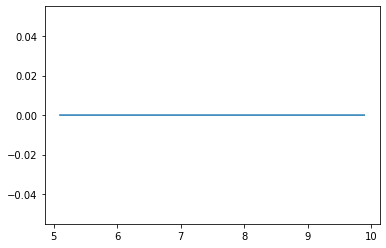

In [6]:
deltam, ml = 4.8, 5.1
MG = PowerLawPlusPeakMass()._logS(m2, deltam, ml)
my = _logSmoothing(m2, deltam, ml)

print(np.isclose(MG,my).all())
plt.plot(m2, (my-MG)/MG, label='MG')

### _logpdfm2_PL

In [7]:
%%time   # 56 ms
# [PowerLawPlusPeakMass()._logS(m2, deltam, ml) for i in range(100)]
print()

UsageError: Can't use statement directly after '%%time'!


In [8]:
%%time
[_logSmoothing(m2, deltam, ml) for i in range(100)]
print()


CPU times: user 49.4 ms, sys: 77.1 ms, total: 127 ms
Wall time: 134 ms


 Power law + peak mass function base values: {'lambdaPeak': 0.03, 'beta': 0.81, 'alpha': 3.78, 'deltam': 4.8, 'ml': 5.0, 'mh': 112.0, 'muMass': 32.0, 'sigmaMass': 3.88}


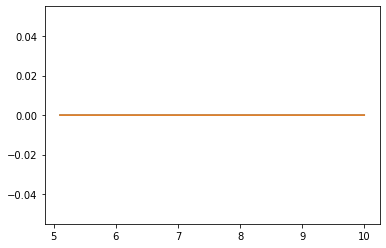

In [9]:

MG = PowerLawPlusPeakMass()._logpdfm2(m2, beta, deltam, ml)
my = _logpdfm2_SPL(m2, beta, deltam, ml)
mask = np.isfinite(my) 

MG1, my1 = MG[mask], my[mask]
plt.plot(m2[mask], (my1-MG1)/MG1)
plt.plot(m2[mask], (my1-MG1))

### _logC

In [10]:
%%time   
# [PowerLawPlusPeakMass()._logC(m2, beta, deltam, ml) for i in range(100)] # 97 ms
print()


CPU times: user 147 µs, sys: 138 µs, total: 285 µs
Wall time: 293 µs


In [11]:
%%time
[_logC_SPL(m2, beta, deltam, ml) for i in range(100)]
print()

[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.25892541e+01 1.26631307e+01 1.27370466e+01
 1.28110014e+01 1.28849951e+01 1.29590274e+01 1.30330982e+01
 1.31072073e+01 1.31164736e+01 1.31813545e+01 1.32555396e+01]
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.25892541e+01 1.26631307e+01 1.27370466e+01
 1.28110014e+01 1.28849951e+01 1.29590274e+01 1.30330982e+01
 1.31072073e+01 1.31164736e+01 1.31813545e+01 1.32555396e+01]
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.25892541e+01 1.26631307e+01 1.27370466e+01
 1.28110014e+01 1.28849951e+01 1.29590274e+01 1.30330982e+01
 1.31072073e+01 1.31164736e+01 1.31813545e+01 1.32555396e+01]
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.105

[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.25892541e+01 1.26631307e+01 1.27370466e+01
 1.28110014e+01 1.28849951e+01 1.29590274e+01 1.30330982e+01
 1.31072073e+01 1.31164736e+01 1.31813545e+01 1.32555396e+01]
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.25892541e+01 1.26631307e+01 1.27370466e+01
 1.28110014e+01 1.28849951e+01 1.29590274e+01 1.30330982e+01
 1.31072073e+01 1.31164736e+01 1.31813545e+01 1.32555396e+01]
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.25892541e+01 1.26631307e+01 1.27370466e+01
 1.28110014e+01 1.28849951e+01 1.29590274e+01 1.30330982e+01
 1.31072073e+01 1.31164736e+01 1.31813545e+01 1.32555396e+01]
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.105

 Power law + peak mass function base values: {'lambdaPeak': 0.03, 'beta': 0.81, 'alpha': 3.78, 'deltam': 4.8, 'ml': 5.0, 'mh': 112.0, 'muMass': 32.0, 'sigmaMass': 3.88}
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.25892541e+01 1.26631307e+01 1.27370466e+01
 1.28110014e+01 1.28849951e+01 1.29590274e+01 1.30330982e+01
 1.31072073e+01 1.31164736e+01 1.31813545e+01 1.32555396e+01]
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.25892541e+01 1.26631307e+01 1.27370466e+01
 1.28110014e+01 1.28849951e+01 1.29590274e+01 1.30330982e+01
 1.31072073e+01 1.31164736e+01 1.31813545e+01 1.32555396e+01]
True


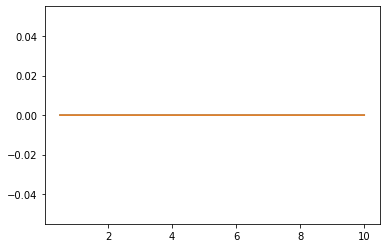

In [12]:

MG = PowerLawPlusPeakMass()._logC(m2, beta, deltam, ml)
my = _logC_SPL(m2, beta, deltam, ml)

print(np.isclose(MG,my).all())
# plt.plot(m2, (my-MG)/MG, label='MG')


mask = np.isfinite(my) 

MG1, my1 = MG[mask], my[mask]
plt.plot(m2[mask], (my1-MG1)/MG1)
plt.plot(m2[mask], (my1-MG1))

### _logN

In [13]:
%%time   
# [PowerLawPlusPeakMass()._logNorm(lambdaPeak,alpha,deltam,ml, mh,muMass, sigmaMass) for i in range(100)] # 90 ms
print()


CPU times: user 155 µs, sys: 130 µs, total: 285 µs
Wall time: 302 µs


In [14]:
%%time   
[_logN_PLP(lambdaPeak,alpha,deltam,ml, mh,muMass, sigmaMass) for i in range(100)]
print()


CPU times: user 166 ms, sys: 13.5 ms, total: 179 ms
Wall time: 190 ms


In [15]:
print(PowerLawPlusPeakMass()._logNorm(lambdaPeak,alpha,deltam,ml, mh,muMass, sigmaMass))
print(_logN_PLP(lambdaPeak,alpha,deltam,ml, mh,muMass, sigmaMass))

 Power law + peak mass function base values: {'lambdaPeak': 0.03, 'beta': 0.81, 'alpha': 3.78, 'deltam': 4.8, 'ml': 5.0, 'mh': 112.0, 'muMass': 32.0, 'sigmaMass': 3.88}
-0.8269342107998224
-0.8269342107998224


## PLP

 Power law + peak mass function base values: {'lambdaPeak': 0.03, 'beta': 0.81, 'alpha': 3.78, 'deltam': 4.8, 'ml': 5.0, 'mh': 112.0, 'muMass': 32.0, 'sigmaMass': 3.88}
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.31164736e+01 1.32555396e+01 1.47344655e+01
 1.62270308e+01 1.77321976e+01 1.92490820e+01 2.07769217e+01
 2.23150519e+01 2.38628878e+01 2.54199107e+01 2.69856570e+01]
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.31164736e+01 1.32555396e+01 1.47344655e+01
 1.62270308e+01 1.77321976e+01 1.92490820e+01 2.07769217e+01
 2.23150519e+01 2.38628878e+01 2.54199107e+01 2.69856570e+01]
True


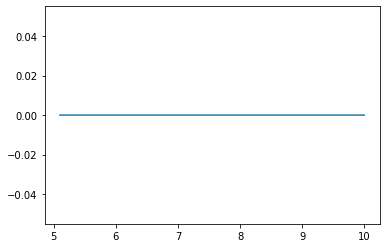

In [16]:
lambda_m  = {"lambda_peak" :      0.039, 
             "alpha" :           3.4,
             "beta" :            1.1, 
             "delta_m" :          4.8, 
             "ml" :              5.1, 
             "mh" :              87., 
             "mu_g" :          34., 
             "sigma_g" :       3.6,}
lm = [lambda_m[k] for k in ["lambda_peak", "alpha", "beta", "delta_m", "ml", "mh", "mu_g", "sigma_g"]]

MG = PowerLawPlusPeakMass().logpdf([m1, m2], lm)
my = logpdf_PLP(m1, m2, lambda_m)

print(np.isclose(MG,my).all())
# plt.plot(m1, (my-MG)/MG, label='MG')


mask = np.isfinite(my) 

MG1, my1 = MG[mask], my[mask]
# plt.plot(m2[mask], (my1-MG1))
plt.plot(m2[mask], (my1-MG1)/MG1)

[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.31164736e+01 1.32555396e+01 1.94444173e+02
 3.96894816e+02 6.09643882e+02 8.29500738e+02 1.05484533e+03
 1.28468411e+03 1.51834124e+03 1.75532539e+03 1.99526231e+03]
 Power law + peak mass function base values: {'lambdaPeak': 0.03, 'beta': 0.81, 'alpha': 3.78, 'deltam': 4.8, 'ml': 5.0, 'mh': 112.0, 'muMass': 32.0, 'sigmaMass': 3.88}
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.31164736e+01 1.32555396e+01 2.28037823e+01
 3.27409593e+01 4.29642136e+01 5.34154778e+01 6.40571093e+01
 7.48625985e+01 8.58122060e+01 9.68906308e+01 1.08085646e+02]
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.31164736e+01 1.32555396e+01 1.94444173e+02
 3.96894816e+02 6.09643882e+02 8.295

/tmp/ipykernel_16220/656690777.py:79: RuntimeWarning: invalid value encountered in subtract
  mean[i] = np.nanmean( (y1-y2) )


[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.31164736e+01 1.32555396e+01 1.94444173e+02
 3.96894816e+02 6.09643882e+02 8.29500738e+02 1.05484533e+03
 1.28468411e+03 1.51834124e+03 1.75532539e+03 1.99526231e+03]
 Power law + peak mass function base values: {'lambdaPeak': 0.03, 'beta': 0.81, 'alpha': 3.78, 'deltam': 4.8, 'ml': 5.0, 'mh': 112.0, 'muMass': 32.0, 'sigmaMass': 3.88}
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.31164736e+01 1.32555396e+01 2.61057391e+01
 3.95834528e+01 5.34997110e+01 6.77565671e+01 8.22933338e+01
 9.70684705e+01 1.12051649e+02 1.27219696e+02 1.42554301e+02]
[0.00000000e+00 5.90760671e-03 4.45582512e-01 2.00264590e+00
 4.34897970e+00 7.10511863e+00 9.79151458e+00 1.14587813e+01
 1.23033560e+01 1.31164736e+01 1.32555396e+01 1.94444173e+02
 3.96894816e+02 6.09643882e+02 8.295

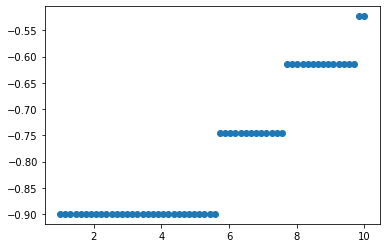

In [28]:
m1 = np.linspace(10,1000)
m2 = m1/2
lambda_m  = {"lambda_peak" :      0.039, 
             "alpha" :           3.4,
             "beta" :            1.1, 
             "delta_m" :          4.8, 
             "ml" :              5.1, 
             "mh" :              87., 
             "mu_g" :          34., 
             "sigma_g" :       3.6,}

grid_res = 60
# grid = np.linspace(5.,7.,grid_res)
grid = np.linspace(1.,10.,grid_res)
mean = np.empty(grid_res)
lambda_masst = lambda_m.copy()

for i in range(grid_res):
    
    
    lambda_masst["sigma_g"] = grid[i]

    lambda_massMG = [lambda_masst[k] for k in ["lambda_peak", "alpha", "beta", "delta_m", "ml", "mh", "mu_g", "sigma_g"]]

    # y1 = logpdf_PLP(m1, m2, lambda_masst)
    y1 = logpdf_PLP(m1, m2, lambda_masst)

    y2 = PowerLawPlusPeakMass().logpdf([m1,m2], lambda_massMG)

    # _logpdfm2_SPL
    # pp = [lambda_masst[k] for k in ["beta", "delta_m", "ml"]]
    # y1 = _logpdfm2_SPL(m2, *pp)
    # y2 = PowerLawPlusPeakMass()._logpdfm2(m2, *pp)

    # _logN_PLP
    # pp = [lambda_masst[k] for k in ["lambda_peak", "alpha", "delta_m", "ml", "mh", "mu_g", "sigma_g"]]
    # y1 = _logN_PLP(*pp)
    # y2 = PowerLawPlusPeakMass()._logNorm(*pp)

    # _logC_SPL
    # pp = [lambda_masst[k] for k in ["beta", "delta_m", "ml"]]
    # y1 = _logC_SPL(m1, *pp)
    # y2 = PowerLawPlusPeakMass()._logC(m1, *pp)

    # _logpdfm1_PLP(lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g)

    # pp = [lambda_masst[k] for k in ["lambda_peak", "alpha", "delta_m", "ml", "mh", "mu_g", "sigma_g"]]
    # y1 = _logpdfm1_PLP(m1, *pp)
    # y2 = PowerLawPlusPeakMass()._logpdfm1(m1, *pp)
    # y1 = np.exp(_logpdfm1_PLP(m1, *pp))
    # y2 = np.exp(PowerLawPlusPeakMass()._logpdfm1(m1, *pp))




    # pp = [lambda_masst[k] for k in ["lambda_peak", "alpha", "delta_m", "ml", "mh", "mu_g", "sigma_g"]]

    # lambdaPeak, alpha, deltam, ml, mh, muMass, sigmaMass = pp
    # res = 200
    # max_compute = max(mh, muMass+10*sigmaMass)
    # ms1 = np.linspace(1., ml+deltam+deltam/10, 200)
    # ms2 = np.linspace( ml+deltam+deltam/10+1e-01, muMass-5*sigmaMass, int(res/2) )
    # ms3= np.linspace( muMass-5*sigmaMass+1e-01, muMass+5*sigmaMass, int(res/2) )
    # ms4 = np.linspace(muMass+5*sigmaMass+1e-01, max_compute+max_compute/2, int(res/2) )
    # y2 = np.sort(np.concatenate([ms1,ms2, ms3, ms4], ))

    # lambda_peak, alpha, delta_m, ml, mh, mu_g, sigma_g = pp

    # mmax = max(mh, mu_g+10*sigma_g)
    # mmid = ml + delta_m + delta_m/10.
    # mm   = np.concatenate([np.linspace(1., mmid, 200),                                    # lower edge                                                    
    #                         np.linspace(mmid+1e-1, mu_g-5*sigma_g, int(res/2)),            # before gaussian peak
    #                         np.linspace(mu_g-5*sigma_g+1e-1, mu_g+5*sigma_g, int(res/2)),  # gaussian peak
    #                         np.linspace(mu_g+5*sigma_g+1e-1, mmax+mmax/2, int(res/2)) ])   # after gaussian peak
    # y1 = np.sort(mm)

    # y1[42:] = -np.inf

    mean[i] = np.nanmean( (y1-y2) )


plt.scatter(grid, mean)

/tmp/ipykernel_16220/1446677731.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.plot(m1, y1-y2)


Text(0.5, 0, 'mass')

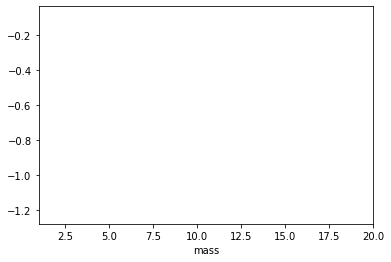

In [29]:
plt.plot(m1, y1-y2)
plt.xlim(1,20)
plt.xlabel("mass")


Text(0.5, 0, 'mass')

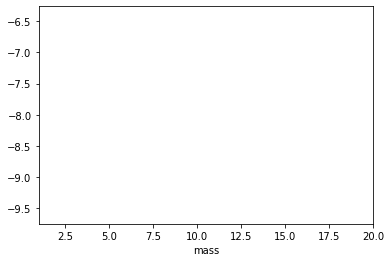

In [30]:
plt.scatter(m1,y1,s=300)
plt.scatter(m1,y2)
plt.xlim(1,20)
plt.xlabel("mass")


In [31]:
y1

array([       -inf, -7.64077366, -8.33795753, -8.74476459, -9.03311696,
       -9.25666248, -9.59175475,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf])

In [32]:
y2

array([       -inf, -6.42100536, -7.4756141 , -8.20067234, -8.72234414,
       -9.14973769, -9.49753493,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf,
              -inf,        -inf,        -inf,        -inf,        -inf])

In [22]:
len(y2)

100

## PL2P

In [23]:
lambda_PL2P  = {"lambda_peak" :      0.039,
                "lambda1" :         0.5, 
                "alpha" :           3.4,
                "beta" :            1.1, 
                "delta_m" :          4.8, 
                "ml" :              5.1, 
                "mh" :              87., 
                "mu1" :             10.,
                "s1":               3.,
                "mu2":              34, 
                "s2":               3.,}

lm = [lambda_PL2P[k] for k in ["lambda_peak", "lambda1", "alpha", "beta", "ml", "mh", "mu1", "s1", "mu2", "s2", "delta_m"]]
MG = MultiPeakMass().logpdf([m1, m2], lm)
my = logpdf_PL2P(m1, m2, lambda_PL2P)

# lm = {k: lambda_PL2P[k] for k in ["beta", "delta_m", "ml"]}
# MG = MultiPeakMass()._logpdfm2(m2, *lm.values())
# my = _logpdfm2_SPL(m2, *lm.values())

# lmMG = [lambda_PL2P[k] for k in ["lambda_peak", "lambda1", "alpha", "ml", "mh", "mu1", "s1", "mu2", "s2", "delta_m"]]
# lmmy = [lambda_PL2P[k] for k in ["lambda_peak", "lambda1", "alpha", "delta_m", "ml", "mh", "mu1", "s1", "mu2", "s2"]]
# MG = MultiPeakMass()._logpdfm1(m2, *lmMG)
# my = _logpdfm1_PL2P(m2, *lmmy)

# lmMG = [lambda_PL2P[k] for k in ["lambda_peak", "lambda1", "alpha", "ml", "mh", "mu1", "s1", "mu2", "s2", "delta_m"]]
# lmmy = [lambda_PL2P[k] for k in ["lambda_peak", "lambda1", "alpha", "delta_m", "ml", "mh", "mu1", "s1", "mu2", "s2"]]
# MG = MultiPeakMass()._logNorm(*lmMG)
# my = _logN_PL2P(*lmmy)
# print(MG, my)

# MG, my = np.exp(MG), np.exp(my)
print(np.isclose(MG,my).all())
plt.plot(m1, (my-MG)/MG, label='MG')

# plt.plot(m1, MG, label='MG')
# plt.plot(m1, my, label='my')

 Multi peak mass function base values: {'lambdaPeak': 0.05, 'lambda1': 0.5, 'alpha': 2.9, 'beta': 0.9, 'ml': 4.6, 'mh': 87.0, 'mu1': 33.0, 'sigma1': 3.0, 'mu2': 68.0, 'sigma2': 3.0, 'deltam': 4.8}


NameError: name 'logpdf_PL2P' is not defined

## PL

True


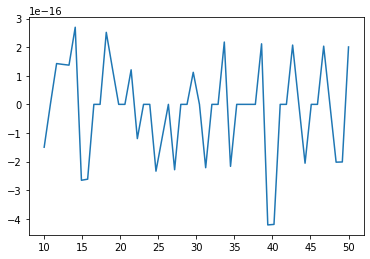

In [ ]:


lambda_PL  = {"alpha" :      0.75,
              "beta" :       1.5,
                "ml" :       4.0,
                "mh" :       87.}

lm = [lambda_PL[k] for k in ["alpha", "beta", "ml", "mh"]]
MG = TruncPowerLawMass().logpdf([m1, m2], lm)
my = logpdf_PL(m1, m2, lambda_PL)

# lm = {k: lambda_PL2P[k] for k in ["alpha", "ml", "mh"]}
# MG = TruncPowerLawMass()._logpdfm1(m1, *lm.values()) -  TruncPowerLawMass()._logNorm( *lm.values()) 
# my = _logpdf_TPL(m1, *lm.values())

# lm = {k: lambda_PL2P[k] for k in ["beta", "ml", "mh"]}
# MG = TruncPowerLawMass()._logpdfm2(m2, *lm.values()) + TruncPowerLawMass()._logC(m1, *lm.values())
# my = _logpdf_TPL(m1, *lm.values())

# _logpdf_TPL(m1, alpha, ml, mh)+_logpdf_TPL(m1, -beta, ml, mh),

# lmMG = [lambda_PL2P[k] for k in ["lambda_peak", "lambda1", "alpha", "ml", "mh", "mu1", "s1", "mu2", "s2", "delta_m"]]
# lmmy = [lambda_PL2P[k] for k in ["lambda_peak", "lambda1", "alpha", "delta_m", "ml", "mh", "mu1", "s1", "mu2", "s2"]]
# MG = MultiPeakMass()._logpdfm1(m2, *lmMG)
# my = _logpdfm1_PL2P(m2, *lmmy)


# MG, my = np.exp(MG), np.exp(my)
print(np.isclose(MG,my).all())
plt.plot(m1, (my-MG)/MG, label='MG')

# plt.plot(m1, MG, label='MG')
# plt.plot(m1, my, label='my')

In [ ]:
lambda_PL
lpar = ["alpha", "beta", "ml", "mh"]
alpha, beta, ml, mh = [lambda_PL[p] for p in lpar]

alpha, beta, ml, mh

(0.75, 1.5, 4.0, 87.0)

In [ ]:
(ml < m2) & (m2 < m1) & (m1 < mh)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
%%time
# [PowerLawPlusPeakMass().logpdf([m1, m2], lm) for i in range(1000)]  # 1.34s
print()


CPU times: user 651 µs, sys: 364 µs, total: 1.01 ms
Wall time: 893 µs


In [ ]:
%%time
[logpdf_PLP(m1, m2, lambda_m) for i in range(1000)]  # 644 ms
print()


CPU times: user 1.21 s, sys: 2.03 ms, total: 1.21 s
Wall time: 1.21 s


# yesss!